In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from getdist import loadMCSamples, plots

# $\Lambda$CDM posteriors 
From EFT likelihoods of *BOSS DR12 LRG 2pt full-shape + rec. bao* & *eBOSS DR16 QSO 2pt full-shape*. 

## Sampled posteriors

In [2]:
basedir = os.path.join('..', 'montepython', 'chains')

In [3]:
def get_S8(samples):
    p=samples.getParams()
    samples.addDerived(p.sigma8 * np.sqrt(p.Omega_m/0.3), name='S8', label=r'S_8')
    
def load_chain(chainname, basedir=basedir, add_S8=True):
    chains = os.path.join(basedir, chainname, chainname)
    samples = loadMCSamples(chains, settings={'ignore_rows':0});
    if add_S8: get_S8(samples)
    return samples

### Planck $\Lambda$CDM + $\nu$

In [4]:
planck = load_chain('base_mnu_plikHM_TTTEEE_lowl_lowE_lensing', add_S8=False)
p=planck.getParams()
planck.addDerived(p.H0/100., name='h', label=r'h')
planck.addDerived(p.logA, name='ln10^{10}A_s', label=r'\ln 10^{10}A_s')
planck.addDerived(np.exp(planck.getParams().logA)*1e-10, name='A_s', label=r'A_s')
planck.addDerived(p.omegabh2 * 100., name='omega_b', label=r'\omega_b')
planck.addDerived(p.omegach2, name='omega_cdm', label=r'\omega_{cdm}')
planck.addDerived(p.ns, name='n_s', label=r'n_s')
planck.addDerived(p.omeganuh2 * 93.14, name='M_nu', label=r'\sum m_\nu', range=[0.06, .25])

### BOSS + BBN $\Lambda$CDM 

In [5]:
boss = load_chain('cdm_eftboss_wc') 

### eBOSS $\Lambda$CDM fixed $\omega_b + n_s$

In [12]:
eboss = load_chain('cdm_efteboss_wc') 

### BOSS + eBOSS $\Lambda$CDM

In [7]:
boss_eboss = load_chain('cdm_eftboss+efteboss_wc') 

## Triangle plots

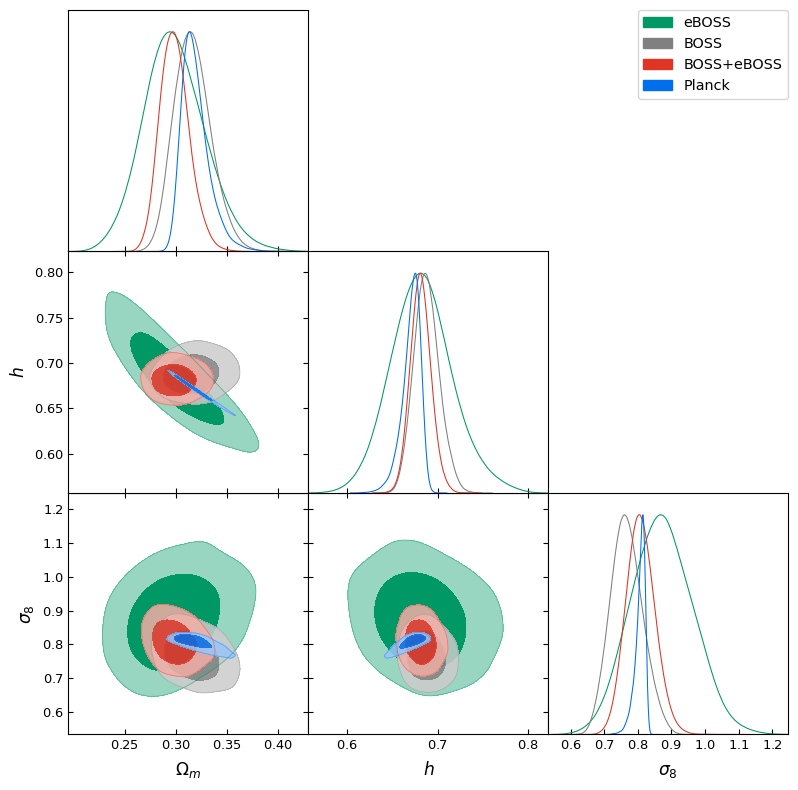

In [8]:
cosmo = ['Omega_m', 'h', 'sigma8']
g = plots.get_subplot_plotter(width_inch=8) 
g.triangle_plot([eboss, boss, boss_eboss, planck],
                cosmo, filled=True, 
                legend_labels=['eBOSS', 'BOSS', 'BOSS+eBOSS', 'Planck']
               )
plt.show()

### BOSS

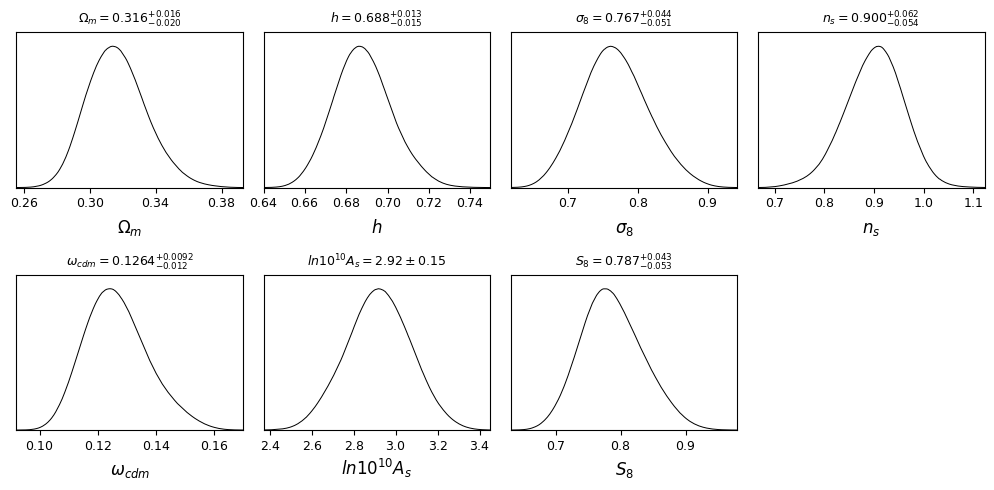

In [9]:
cosmo = ['Omega_m', 'h', 'sigma8', 'n_s', 'omega_cdm', 'ln10^{10}A_s', 'S8']
g = plots.get_subplot_plotter(width_inch=10) 
g.plots_1d([boss], cosmo, filled=True, title_limit=1, nx=4)
plt.show()

### eBOSS

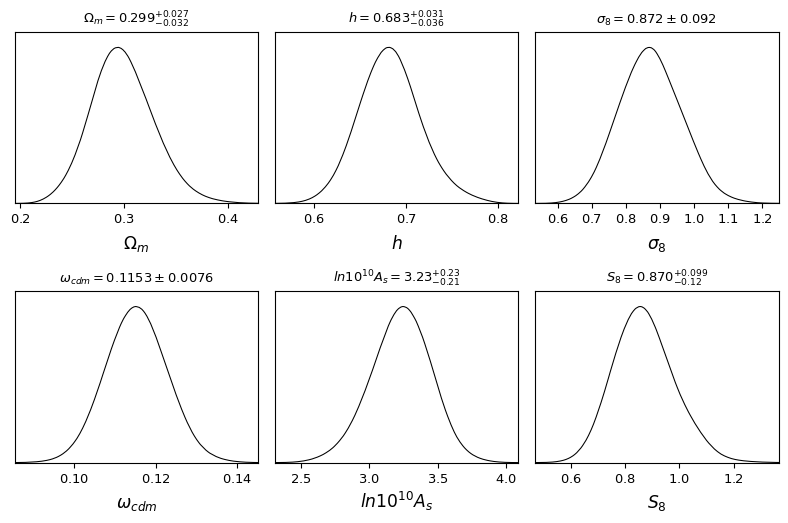

In [10]:
cosmo = ['Omega_m', 'h', 'sigma8', 'omega_cdm', 'ln10^{10}A_s', 'S8']
g = plots.get_subplot_plotter(width_inch=8) 
g.plots_1d([eboss], cosmo, filled=True, title_limit=1, nx=3)
plt.show()

### BOSS+eBOSS

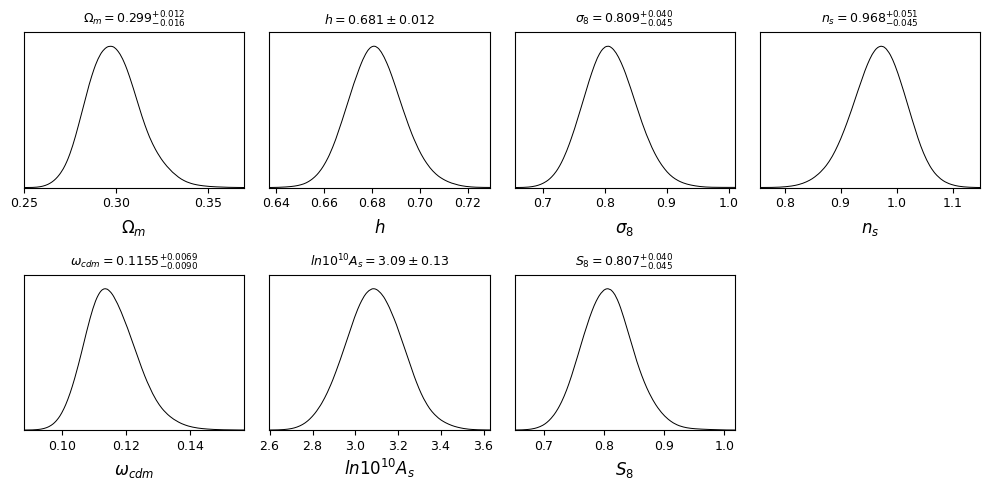

In [11]:
cosmo = ['Omega_m', 'h', 'sigma8', 'n_s', 'omega_cdm', 'ln10^{10}A_s', 'S8']
g = plots.get_subplot_plotter(width_inch=10) 
g.plots_1d([boss_eboss], cosmo, filled=True, title_limit=1, nx=4) 
plt.show()